# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

Breast Cancer: 569
Number of attribues: 30
Classes total: 357 - 212

Classes train: 249 - 24
Classes test:  108 - 188


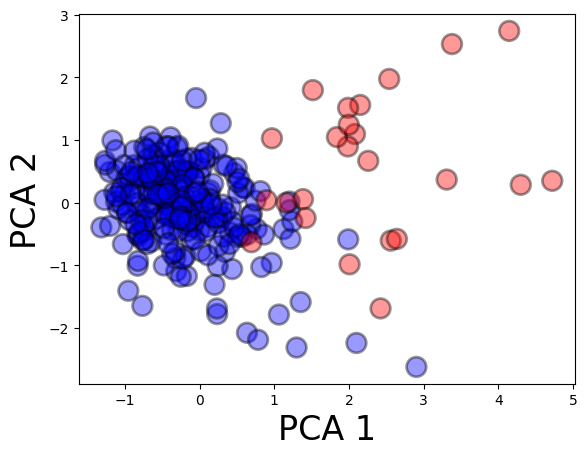

In [2]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[0]  # change ind to select dataset to use
model = 'SVM-rbf'

data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}
Original


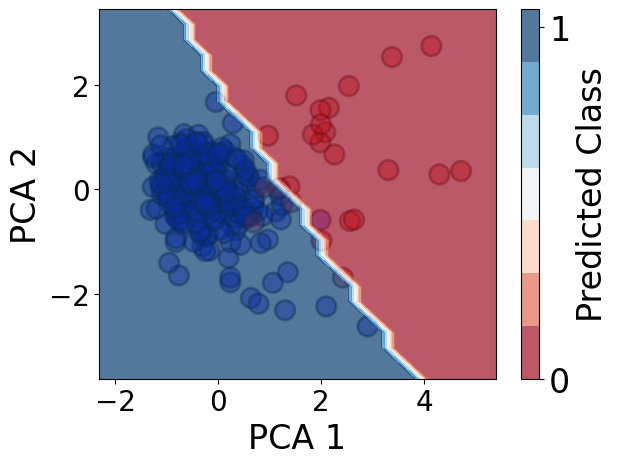

SMOTE


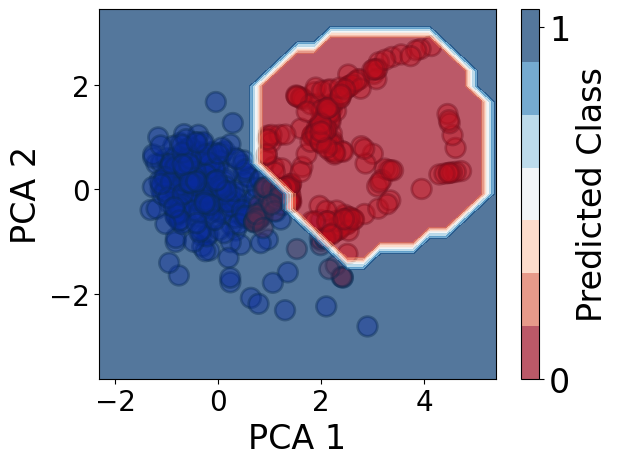

Balanced Weights


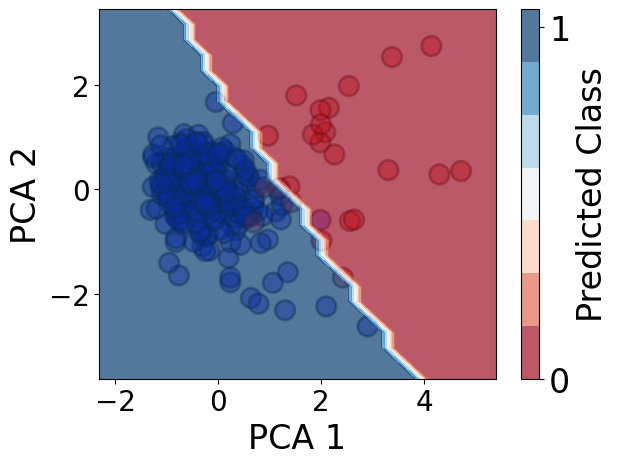

BMR


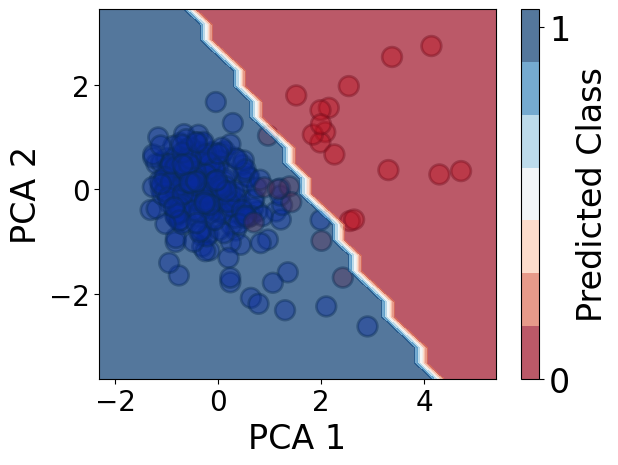

Threshold


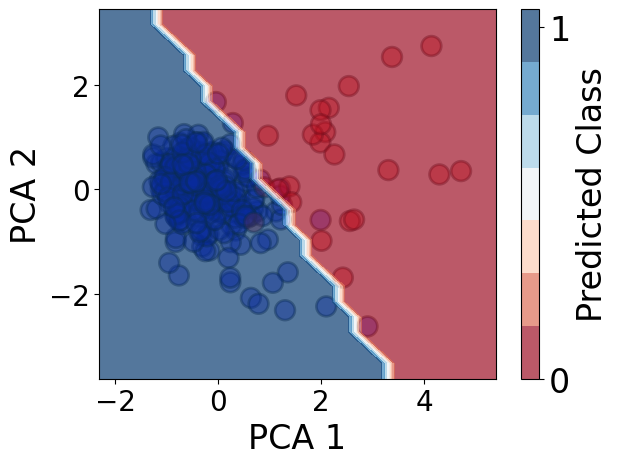

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

Original Data


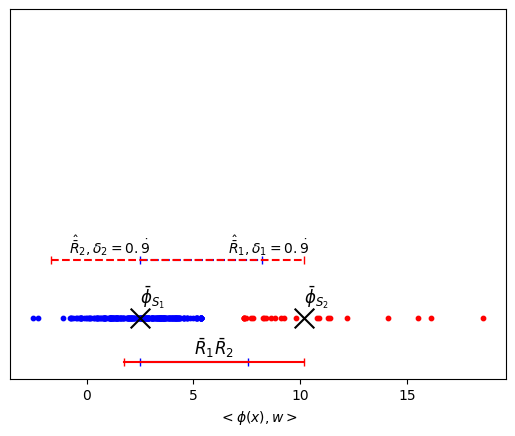

Budget 136 found 58 viable downsampled solutions
Best solution found by removing 72 data points
Downsampled Data:


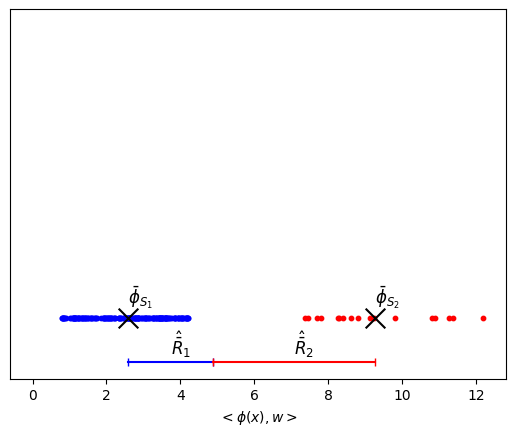

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

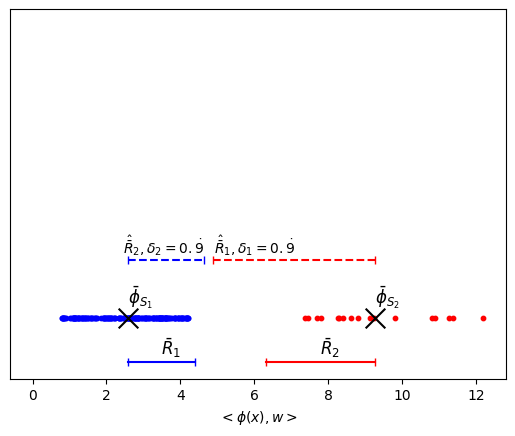

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [6]:
deltas_model.print_params()

Parameters
                R:  12.198491913847647
                N1: 184
                N2: 17
                R1: 1.7953051000600215
                R2: 2.939308995200804
                M:  1.9359334345413366
                D:  6.670547529802162
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Original          0.929054  0.942496  0.944149  0.940845
SMOTE             0.733108  0.761373  0.787924  0.735786
Balanced Weights  0.929054  0.942496  0.944149  0.940845
BMR               0.861486  0.884260  0.890957  0.877612
Threshold         0.942568  0.946771  0.946907  0.953678
Our Method        0.962838  0.956707  0.956954  0.970976 


Original


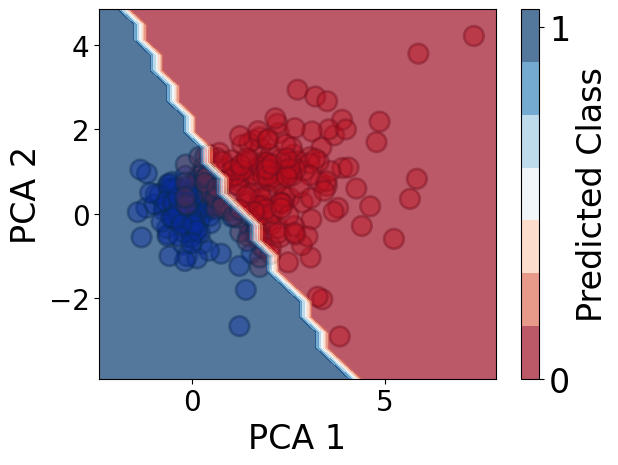

SMOTE


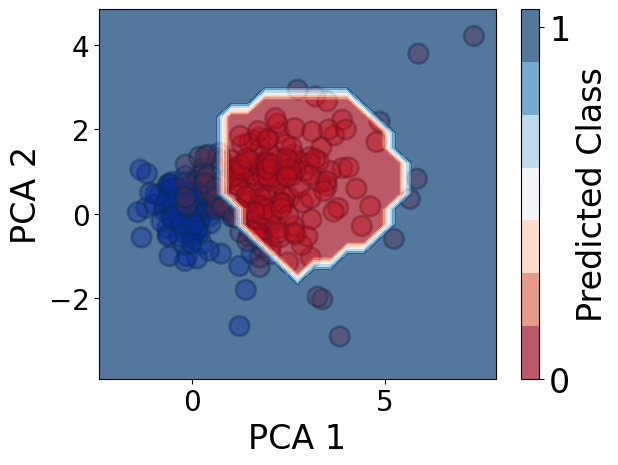

Balanced Weights


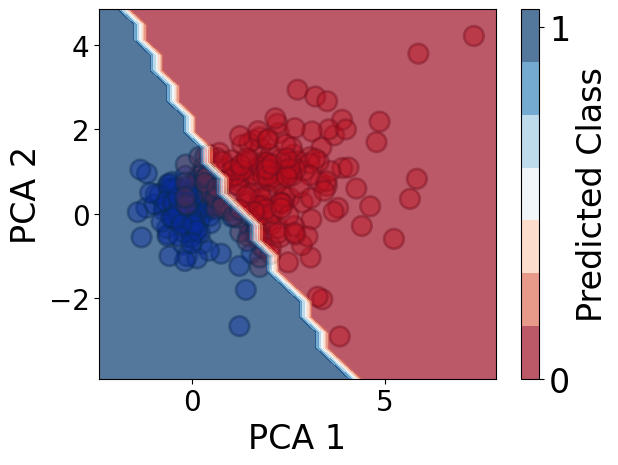

BMR


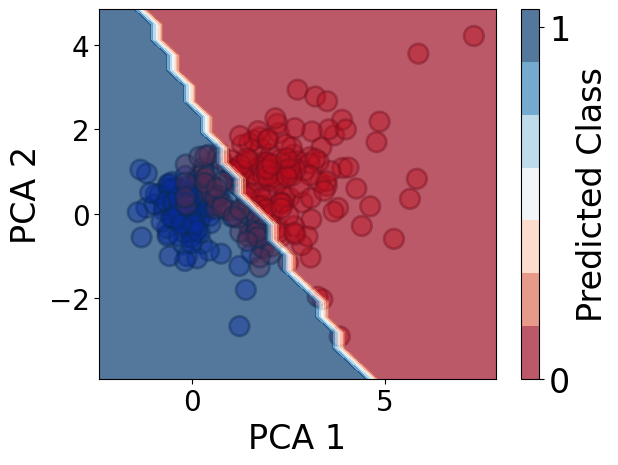

Threshold


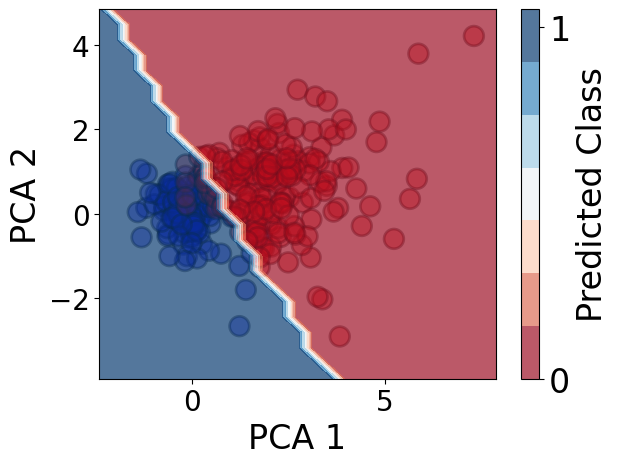

Our Method


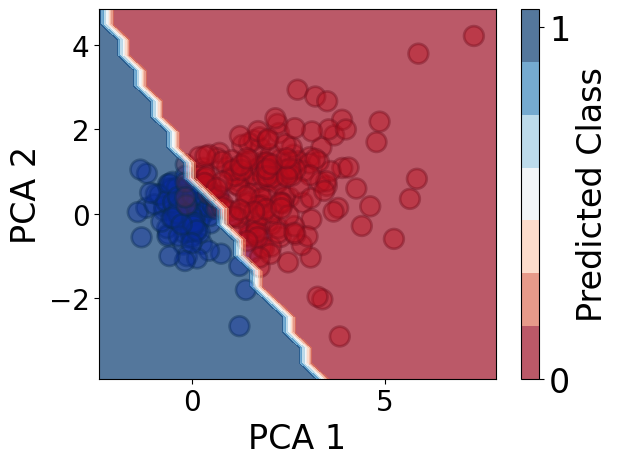

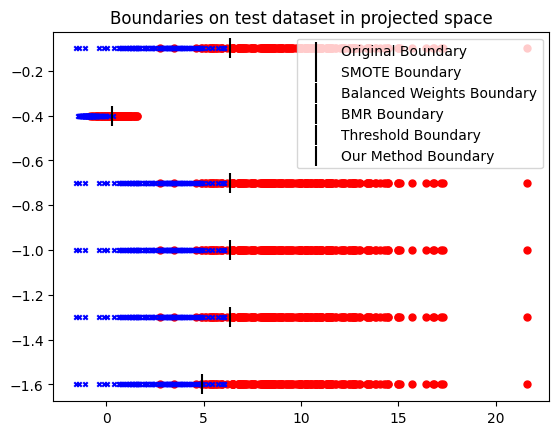

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9291 & 0.9425 & 0.9441 & 0.9408 \\
SMOTE & 0.7331 & 0.7614 & 0.7879 & 0.7358 \\
Balanced Weights & 0.9291 & 0.9425 & 0.9441 & 0.9408 \\
BMR & 0.8615 & 0.8843 & 0.8910 & 0.8776 \\
Threshold & 0.9426 & 0.9468 & 0.9469 & 0.9537 \\
Our Method & 0.9628 & 0.9567 & 0.9570 & 0.9710 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.929054,0.942496,0.944149,0.940845
SMOTE,0.733108,0.761373,0.787924,0.735786
Balanced Weights,0.929054,0.942496,0.944149,0.940845
BMR,0.861486,0.884260,0.890957,0.877612
Threshold,0.942568,0.946771,0.946907,0.953678
Our Method,0.962838,0.956707,0.956954,0.970976


In [7]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])